
## No-Show appointments data analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
Introduction

The project aims at analyzing the No-show appointments data set and arriving at necessary conclusions.This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.
  From the data set, we can see if there is any relation between the gender of the patient and their showing up for the appointment. We can also see whether there is a trend among those who received scholarships. We will also be able to find out whether the patient's age affects their showing up for the appoinment.Conclusions can be arrived at based on the results obtained.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [6]:

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Loads the data set and displays the first 5 rows.

In [24]:
df.shape

(110527, 14)

Returns the number of rows and columns of the data set.

In [25]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding null values.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [27]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


Displays the last 5 rows of the data set.


### Data Cleaning 

In [28]:
#Cleaning the data before analyzing it.
df.drop(['PatientId', 'AppointmentID', ], axis=1, inplace = True)

In [29]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Dropped the 'PatientId' and 'ApointmentID' colums as it was not very much essential for analyzing this data set.

In [30]:
df.dropna(inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(7), object(5)
memory usage: 11.0+ MB


Drops null values if any.

<a id='eda'></a>
## Exploratory Data Analysis



### Is there any relation between the age of the patient and their showing up for the appointment?

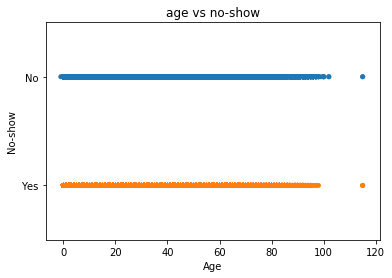

In [8]:

sample = sns.stripplot(x="Age", y="No-show", data=df)
plt.title("age vs no-show");

The graph shows the relationship between age and no-show.From the graph we can see that children below 10 years show up for appoinments more while people above 90 years are unlikely to show up for appoinments.Most of the people between 40-60 years also show up for appoinments.

### Is there any trend among those who received scholarships?

In [39]:
df['Scholarship'].mean()

0.098265582165443732

finds the mean of scholarship.

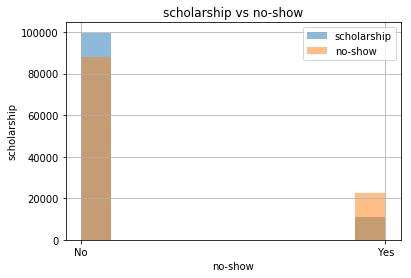

In [4]:
df['Scholarship'].hist(alpha=0.5,  label='scholarship')
df['No-show'].hist(alpha=0.5,  label='no-show')
plt.xlabel("no-show")
plt.ylabel("scholarship")
plt.title("scholarship vs no-show")
plt.legend();

A histogram which shows the relationship between scholarship and no-show.From the histogram we can see that, people who received scholarships showed up for appointments more when compared to those who did not receive any.

In [41]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

A function which gives the count of male and female patients.

In [43]:
df.query('Gender == "M" ')['Age'].median(), df.query('Gender == "F" ')['Age'].median()

(33.0, 39.0)

Returns the median of the ages of male and female patients.

<a id='conclusions'></a>
## Conclusions

From the results obtained by performing various operations on the data set, we can conclude that, we don't see any trend in the age of the patients and their showing up for the appointment. Those who received scholarship may have shown up for the appointment more.
   Limitations-Instead of find the mean and replacing the null values with their respective means, we could find some other more effective ways like regression.The data is also not representative of the entire population, making it hard to arrive at a conclusion.


In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0